# Machine Learning (ML)
> Machine learning is a subset of artificial intelligence in the field of computer science that often uses statistical techniques to give computers the ability to "learn" with data, without being explicitly programmed.
   [Wikipedia](https://en.wikipedia.org/wiki/Machine_learning)

Human can learn by copying what the other humans do (learning from data) or they can directly learn the rules (e.g. learning math). Machine learning happens when a machine (e.g. computers) learns from data. Using the rules directly is programming.

### How to turn data to information

1. If you know the data, and know the rules, you can make a program to make decisions based on data.
1. If you have data and you know the answers, you can let the computer to learn the rules
1. If you have the data, but don't know anything, you can explore the data with unsupervised method

![Machine learning vs programming](figures/MachineLearning.svg)

### Some applications
![Kirittäret](figures/Kirittaret.jpg)

Jyväskylä Kirittäret won the Finnish championship of baseball. They say that they had collected more data than they competitors about previous games. It is nowadays common in sports that the own and competing teams are hevily analyzed. Data analytics and machine learning is even more heavily used in international sports events.

#### Politics 
Statistics and ML plays a significant role also in the USA precidential elections. The opinions of the people in different states are known, and speeches written based on statistics. [Cambridge Analytica](https://en.wikipedia.org/wiki/Cambridge_Analytica) had a significant role in the previous elections already. Data mining based political consulting was their main business. Their interference to elections was recarded as scandalous by some, and they regard CA as [controversial company](https://www.politico.com/news/2020/02/19/trump-cambridge-analytica-oczkowski-114075). Some governmental organizations, [Internet Reserch Agency](https://en.wikipedia.org/wiki/Internet_Research_Agency), do utilize similar methods trying to affect to other nations. Perhaps these methods are staying for good, but it is really important for a citizen to understand it.

#### Social media
The participants of this course may find a document [Valvontakapitalismin vaarat / Social Dilemma](https://www.netflix.com/title/81254224) as interesting. It describes the social media as a system, where AI and ML is analyzing the users, and the algorithms try to keep them addicted. According to he movie, the users are the product which are sold to advertisers and opinion leaders. The social media is said to build discussion bubbles which form a tailor made view to the reality for each user, thus polarizing the views. Social media provides excellent possibilities to analyze the behaviour and opinions of the individuals in almost real time and act upon.

## Regression
The purpose of the regression is to find a function $f$, which predicts a continuous variable $y$ based on data $x$:

$$
  y= f(x)
$$

For example. In the training phase, find out what is function $f(x)$. Then the found model can be used for predicting, what is the value marked as question mark.

<table>
<tr><th>y</th><th>x0</th></tr>
<tr><td>0.00</td><td>0.00</td></tr>
<tr><td>2.00</td><td>1.00</td></tr>
<tr><td>4.00</td><td>2.00</td></tr>
<tr><td>6.00</td><td>3.00</td></tr>
<tr><td>?</td><td>4.00</td></tr>
<tr><td>10.00</td><td>5.00</td></tr>
</table>

Usually the data contains noise, so what would be the model, f(x), for the following data, and what is the missing value ?

<table>
<tr><th>y</th><th>x0</th></tr>
<tr><td>0.09</td><td>-0.08</td></tr>
<tr><td>2.35</td><td>1.13</td></tr>
<tr><td>4.06</td><td>1.98</td></tr>
<tr><td>5.79</td><td>2.90</td></tr>
<tr><td>?</td><td>4.16</td></tr>
<tr><td>10.12</td><td>5.06</td></tr>
</table>

The regression model can be also fitted to the higher dimensional data: $y = f(x_1, x_2, ...)$

<table>
<tr><th>y</th><th>x0</th><th>x1</th><th>x2</th></tr>
<tr><td>0.09</td><td>-0.08</td><td>7.02</td><td>7.10</td></tr>
<tr><td>2.35</td><td>1.13</td><td>8.49</td><td>7.36</td></tr>
<tr><td>4.06</td><td>1.98</td><td>9.67</td><td>7.69</td></tr>
<tr><td>5.79</td><td>2.90</td><td>11.26</td><td>8.36</td></tr>
<tr><td>?</td><td>4.16</td><td>12.81</td><td>8.65</td></tr>
<tr><td>10.12</td><td>5.06</td><td>14.04</td><td>8.98</td></tr>
</table>

### Interactive example

Browse over the following section of code and take a look of the plots below. The first plot is the data generator, which generates the x-data from the 2nd order polynomial, whose coefficients a,b and c you can adjust as well as the noise level. 

The next window let's you fit a regression line into the data. Above the windows is also the coefficient of fit, $R^2$, which measures how well the data fits to the model. Try to fit the regression line to the data as well as you can. How does the different noise levels affect to the model fitting? Can you fit a regression line to the second order polynomial, when a is not zero?

After fitting the model, run the following code cell and let it predict the $y$-values from $x$ with the model. Look at the prediction error with the noiseless model and the Root Mean Square Error (RMSE) of the prediction.

#### Coefficient of determination, $R^2$
The [coefficient of determination](https://blog.minitab.com/blog/adventures-in-statistics-2/regression-analysis-how-do-i-interpret-r-squared-and-assess-the-goodness-of-fit), $R^2$, defines how large proportion of the variance in $y$ is explained by the model. $R^2$ is zero if the model cannot predict anything and it is 1 when the model fit is perfect. 

For Ordinary Least mean Squares regression models (OLS) it is the same as the square of the correlation coefficient.

#### Root Mean Square Error, RMSE
[RMSE](https://towardsdatascience.com/what-does-rmse-really-mean-806b65f2e48e), is another often used measure for model fitness. RMSE shows the average prediction error in the same units and scale than $y$.

In [22]:
import ipywidgets as widgets
from IPython.display import display
from ipywidgets import interact, interactive, fixed, interact_manual
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
import numpy as np


In [8]:
x=None
data=None
gk=None
gl=None
ga,gb,gc = (0.0, 0.0, 0.0)
R = widgets.Label(value="0.0")

fig=plt.figure(figsize=(5,5))
print("Set up first the parameters of the data a, b, c an the noise amplitude:")
print(" Data is then generated as follows: y = a*x^2 + b*b + c + noise")
@interact(
        a = widgets.FloatSlider(value=0, min=-1, max=2, step=0.1, description='a'),
        b = widgets.FloatSlider(value=1.0, min=-1, max=2, step=0.1, description='b'),
        c = widgets.FloatSlider(value=1.0, min=-1, max=1, step=0.1, description='c'),
        noise = widgets.FloatSlider(value=1.1, min=0, max=5, step=0.1, description='Noise'))
def create_data(a,b,c,noise):
    global x, data, ga,gb,gc, R
    x=np.linspace(0,5)
    e=np.random.normal(size=len(x), loc=0.0, scale=noise)
    data = a*x**2 + b*x + c + e
    plt.scatter(x,data,c='r')
    ga,gb,gc = a,b,c
    plt.show()
    

Set up first the parameters of the data a, b, c an the noise amplitude:
 Data is then generated as follows: y = a*x^2 + b*b + c + noise


<Figure size 360x360 with 0 Axes>

interactive(children=(FloatSlider(value=0.0, description='a', max=2.0, min=-1.0), FloatSlider(value=1.0, descr…

In [23]:
print("-------------------------------------------------")
print("Then adjust the paramters of the regression line")
print("Try to maxmimize the coefficient of determination, R^2")
@interact(k=widgets.FloatSlider(value=0.1, min=-2, max=5, step=0.1, description='Reciprocal, k'), 
          l=widgets.FloatSlider(value=0.1, min=-2, max=5, step=0.1, description='Constant, l'))
def fit(k,l):
    global x, data, gk, gl, R
    ax=plt.gca()
    y=k*x+l    
    ax.scatter(x,data, c='r')
    ax.plot(x,y)
    R.value="%3.2f" % r2_score(data, y)
    gk=k
    gl=0
    plt.show()
    
def predict(value):
    global gk, gl
    global ga, gb, gc
    y_pred=gk*value + gl
    y_true=ga*value**2 + gb*value + gc
    return(y_true, y_pred)

result=widgets.HBox([widgets.Label(value="Coefficient of determination, R="), R])
display(result)

-------------------------------------------------
Then adjust the paramters of the regression line
Try to maxmimize the coefficient of determination, R^2


interactive(children=(FloatSlider(value=0.1, description='Reciprocal, k', max=5.0, min=-2.0), FloatSlider(valu…

### Prediction

The regression model defined above can be now used for prediction. One measure of the accuracy of the prediction is to predict several values along the whole x-range, and calculate square root of the mean squared error or mean absolute error. This error measures are called as Root Mean Square Error (RMSE) and Mean Absolute Error (MAE) of prediction, respectively. 

In [24]:
px=np.arange(5)
y_true,y_predicted = predict(px)
error = y_true - y_predicted
square_error=error**2
absolute_error = abs(error)
print("x \tTrue y \tPredicted y \tError \tSquare error \tAbsolute error")
print("-"*70)
for i in range(len(px)):
    print("%3.2f\t%3.2f\t%3.2f\t\t%3.2f\t%3.2f\t\t%3.2f" % (px[i], y_true[i], y_predicted[i], 
                                                       error[i], square_error[i], absolute_error[i]))
print("-"*70)
print("Sum of square/abs error \t\t%3.2f\t\t%3.2f" % (sum(square_error), sum(absolute_error)))
print("Root of the mean square error, RMSE \t%3.2f" % (np.sqrt(square_error.mean())))
print("Mean Absolute Error (MAE)           \t\t\t%3.2f" % (absolute_error.mean()))

x 	True y 	Predicted y 	Error 	Square error 	Absolute error
----------------------------------------------------------------------
0.00	0.40	0.00		0.40	0.16		0.40
1.00	1.70	2.40		-0.70	0.49		0.70
2.00	3.40	4.80		-1.40	1.96		1.40
3.00	5.50	7.20		-1.70	2.89		1.70
4.00	8.00	9.60		-1.60	2.56		1.60
----------------------------------------------------------------------
Sum of square/abs error 		8.06		5.80
Root of the mean square error, RMSE 	1.27
Mean Absolute Error (MAE)           			1.16


## Supervised  Machine Learning in general case
Task is to find a function $f$, which predicts variable $y_i$ based on $p$ features $x_{i,j}$, where $i \in [0,N]$ and $j \in [0,P]$.

$$
   \begin{bmatrix}
   y_1 \\
   y_2 \\
   \vdots \\
   y_n
   \end{bmatrix}
   = f 
   \left( \begin{bmatrix}
     x_{11} & x_{12} & x_{13} & \dots  & x_{1p} \\
     x_{21} & x_{22} & x_{23} & \dots  & x_{2p} \\
     \vdots & \vdots & \vdots & \ddots & \vdots \\
     x_{n1} & x_{n2} & x_{n3} & \dots  & x_{np}
   \end{bmatrix} \right)
$$


 * The purpose of the supervised machine learning is the teach an algorithm to repeat the prediction of values $y_i$ carried out by a reference method. 
 * This is useful if the reference method is more expensive, slower or it has other problems
 * Often the reference method is a human observer, and it can be replaced with an algorithm
 * If the predicted value $y_i$ is categorical, the method is called classification, because it assigns samples in classes
 * If the predicted value $y_i$ is continuous variable, the method is called as regression. 
 * There are many methods for implementing both classification and regression
 * Variable $y$ is called as dependent variable and $x$ as independent variable, since the values of $y$ depend on $y$.

# Linear regression

In machine learning, the fitting of the model to the data is not done manually, but by using various mathematical algorithms.

### Ordinary Least Mean Squares using p-features

* Classic regression, usually the first choice
* Does not work well when the dimensionality of the problem is high and there is too much **noise** in the training data

$$  \hat{y} = \beta_0 + \beta_1 x_1 + \beta_2 x_2, ..., \beta_n x_n + \epsilon$$

In the above 1-dimensional case, the regression is simply

$$  \hat{y} = \beta_0 + \beta_1 x + \epsilon $$

where $\beta_1$ is the reciprocal and $\beta_0$ is the constant (the y-axis crossing point) and $\epsilon$ is the prediction error. The optimal solution is when the squared sum of error (Loss function, $L()$) between predicted and true values is minimized:

$$
   L(\beta) = \sum_{i=1}^{n} (y_i - \hat{y})^2
$$

The linear regression has a well known solution, which can be calculated very efficiently (closed form):

$$
   \beta = (\mathbf{X}^T\mathbf{X})^{-1}\mathbf{X}^T Y,
$$

Where $\mathbf{X}$ is a matrix containing data samples in rows, and variables in columns. It is also called as design matrix, at it was shown in the top of this section.



### Example: Heating power needs versus temperature 

The following data set contains the energy consumed by a central heating system of a town in Northern Finland and some weather parameters. Both data are recorded hourly over year 2016. Can the regerssion model predict the energy consumption based on the weather parameters?

Lets firs read the data and print some first rows of the data.

In [11]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from datetime import timedelta
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
sns.set()


In [12]:
data=pd.read_hdf('data/heatneed.h5').dropna()
data.head()

,Heat,temperature,Wind,Rain,Clouds
2016-01-01 00:00:00,9.2,-2.6,5.8,0.0,8.0
2016-01-01 01:00:00,9.4,-2.8,4.8,0.0,8.0
2016-01-01 02:00:00,9.6,-3.4,5.7,0.0,8.0
2016-01-01 03:00:00,9.8,-3.7,4.6,0.0,8.0
2016-01-01 04:00:00,10.0,-4.3,4.8,0.0,8.0


Then we can study the dependencies of the parameters graphically by plotting them against each other.

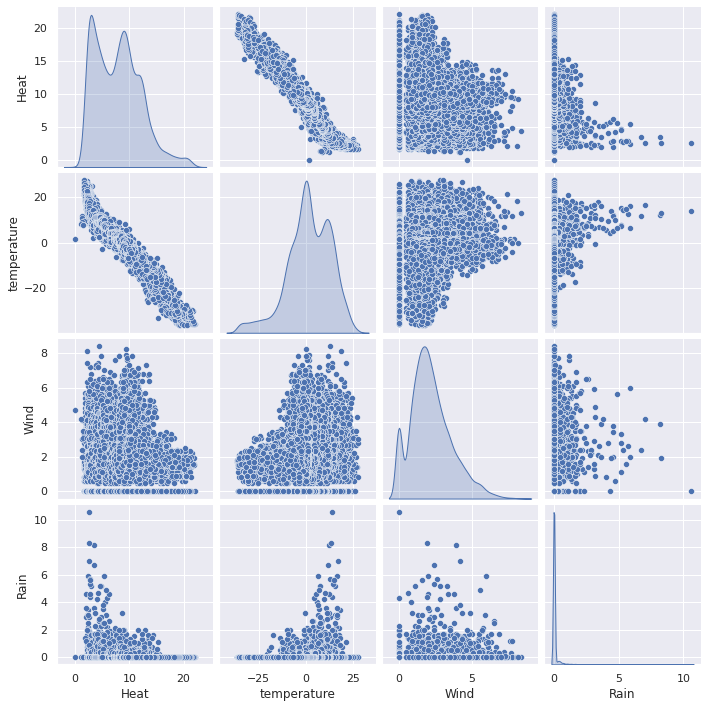

In [16]:
sns.pairplot(data.iloc[:,:-1], diag_kind='kde')

The air temperature and heat consumption seem to have strong correlation. Lets buil a regression model which tries to predict the heat consumption based on the air temperature.

Use the model to predict the energy consumption when the air temperature is $-10^o C$.

In [27]:
### Build linear regression model between heating needs and outside temperature
reg=LinearRegression()
reg.fit(data.iloc[:,1:2].values, data.iloc[:,0].values)
b1=reg.coef_
b0=reg.intercept_
data.plot.scatter(x='temperature', y='Heat', s=2, alpha=0.3, c='b')
plt.plot(data.temperature, b0 + b1*data.temperature, 'r', alpha=1)
plt.text(-10,16,'P = %3.2f $\cdot$ t + %3.2f MW' % (b1,b0))
plt.ylabel('District Heating power / MW')
plt.title('Linear fit of heating needs as a fuction of air temperature')
r2=r2_score(data.Heat, b0 + b1*data.temperature)
plt.text(0,13,'$R^2$ = %3.2f' % (r2))

reg.predict([[-10]])

AttributeError: 'numpy.ndarray' object has no attribute 'iloc'

# Classification

When the predicted variable is not continuous, but categorical, and the model predicts categories instead of continuous values, then the result is the classification of samples. 

## Iris classification example
| Setosa | Versicolor | Virginica |
| -------| ---------- |-----------|
| ![Setosa](figures/I-setosa-var-arctica.jpg "Setosa") | ![Versicolor](figures/Iris_versicolor_3.png "Versicolor") | ![Virginica](figures/Iris_virginica.jpg "Virginica") |
<span id="kuvaviite">Images from Wikimedia Commons</span>


How to recognize differect species of Iris? Can the dimensions of sepals and pedals be sufficient.

In [28]:
from sklearn import datasets
from sklearn import svm
iris=datasets.load_iris()
from snippets import plotDB, DisplaySupportVectors
from sklearn.metrics import accuracy_score, confusion_matrix

['setosa' 'versicolor' 'virginica']


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Species
143,6.8,3.2,5.9,2.3,2
25,5.0,3.0,1.6,0.2,0
133,6.3,2.8,5.1,1.5,2
137,6.4,3.1,5.5,1.8,2
92,5.8,2.6,4.0,1.2,1


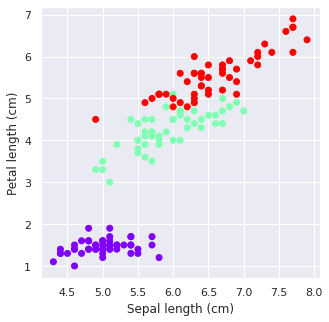

In [29]:
plt.figure(figsize=(5,5))
plt.scatter(iris.data[:,0], iris.data[:,2], c=iris.target, cmap='rainbow')
plt.xlabel('Sepal length (cm)')
plt.ylabel('Petal length (cm)')

df=pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['Species'] = iris.target
print(iris.target_names)
df.sample(5)

In [30]:
X=iris.data[:,[0,2]]
accuracy = widgets.Label(value="0.0")
result=widgets.HBox([widgets.Label(value="Accuracy, R="), accuracy])
display(result)
@interact(gamma=widgets.FloatLogSlider(value=-1, min=-2, max=1, step=0.1, description='Gamma'))
def classifier(gamma):
    global accuracy
    predictor=svm.SVC(kernel='rbf', C=0.5, gamma=gamma)
    predictor.fit(X=X, y=iris.target)
    classes = predictor.predict(X=X)
    #plt.scatter(iris.data[:,0], iris.data[:,2], c=classes, cmap='rainbow')
    plotDB(predictor, X=X, y=iris.target, figsize=(5,5))
    accuracy.value = "%3.2f" % (accuracy_score(iris.target, classes))
    plt.show()
   


interactive(children=(FloatLogSlider(value=0.01, description='Gamma', max=1.0, min=-2.0), Output()), _dom_clas…

## Orange 

Orange is an open source interactive software application for machine learning without programming. If you have already installed Anaconda Navigator, you can install Orange by one click from the navigator. See the figure below and watch the related video of using Orange.

![Orange application](figures/orange.jpg)

# Neural networks

Neural network consists of few layers of perceptrons. Each perceptron simulates the operation of neuron. It collects input variables $x_i$, weights them with coefficients $w_i$, and sums the result to one value. The output value is obtained by scaling the sum between values 0...1 by using an activation function. For classification, the activation function is binary step function, and for regression, it is continuous, like sigmoid function. The neuron can be teached by updating the weights $w_i$.

![Perceptron](figures/perceptron.svg)

The output of the perceptron is

$$
  y = f\left(\mathbf{x} \cdot \mathbf{w} + b\right) 
  = f\left( \Sigma_{i=1}^{n} (x_i w_i) + b \right)
$$

A single perceptron can only handle simple problems. For more complex problems, a network of several layers of perceptrons are needed. These networks are called as Multi Layer Perceptron networks (MLP) or artificial neural networks (ANN). When the number of hidden layer is large, the network is called as Deep Neural Network (DNN) and it is one example of Deep Learning.

![MLP](figures/mlp.svg)




## Training a neural network

Training of a neural network is carried out through following steps

1. The training data, including input data $X$ and the correct answers $y$ is selected
1. The training data is split in one or more **batches**
1. The training of the network is carried out it **iterations**, each iteration uses one batch of training data. The results of the network is compared against the correct output, and the coefficients of the network are updated to produce better results next time
1. The training is proceed in next iteration, until all batches of input data is consumed
1. At this time one **EPOCH** passed. The training often continues by using the same data again, and the whole training process can last from one EPOCH up to hundreds of EPOCHs.


![Training of MLP](figures/mlp_training.svg)




### When to stop training

 - The performance of the network usually improves when the traning continues.
 - The learning is fast in the beginning, but slows down after the network is well trained already 
 - If the training continues too long, the network starts memorizing the training data and the performance is still seemingly improving, but the network's capability to predict new data starts decreasing. This situation is called as overfitting.
 - The amount of overfitting may be monitored by testing the prediction also in the separate validation set which is not used for training.
 - When the performance in the validation set starts decreasing, it is time to stop training.

![When to stop trainig](figures/stoptraining.svg)

Try to train multi layer neural network models in [Neural Network Playground](https://playground.tensorflow.org/).


## Example

The above Iris example can be classified using Multi Layer Perceptron Classifier (MLPC) but SVM already handled that problem well and because the number of samples in the dataset is only 150, it is only sufficient for training very thin MLPC. Therefore, lets create an artificial classification problem with 1000 samples and tree partly overlapping classes to make the problem more challengin and train an MLPC for solving it. 

In [20]:
from sklearn.neural_network import MLPClassifier
from sklearn import datasets

# Make a random 3-class classification problem, with 1000 samples and 2 features
X,y=data=datasets.make_classification(n_samples=1000, n_features=2, n_classes=3, random_state=2,
                                  n_clusters_per_class=1, n_informative=2, n_redundant=0)

# Create a multilayer perceptron classifier with 10 and 6 perceptrons in hidden layer
predictor = MLPClassifier(hidden_layer_sizes=(10,6), max_iter=1000)
predictor.fit(X=X, y=y)
classes = predictor.predict(X)

# Assess the accuracy of the classifier
accuracy = accuracy_score(y_true=y, y_pred=classes)
M=confusion_matrix(y, classes)

[[308  20   7]
 [ 10 321   4]
 [  6  16 308]]
Prediction accuracy is 0.937


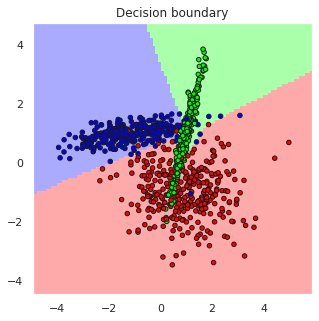

In [21]:

# Plot the results and decision boundaries
print(M)
print("Prediction accuracy is", accuracy)
plotDB(predictor, X=X, y=y, figsize=(5,5))

# Summary

- Machine Learning (ML) is a collection of methods to make the computer to learn the decision rules, without explicitely programming them
- The supervised ML can be used in predicting a continuous variable (regression) or a class label (classification)
- A supervised machine learning algorithm is trained to perform prediction based on the training data, which contains correct predictions (golden truth)
- When these correct predictions are missing, only unspervised methods are used. 
- Unsupervised methods are for example dimensionality reduction and clustering. They are helpfull for data exploration and preprocessing. for example dimensionality reduction can be important for further algorithms.
- Linear Regression can be used for predicting one unknown quantity (dependent variable) based on one or more known variables (independent variables). There are also many other regression techniques, also non-linear.
- Support Vector Machine (SVM) is one popular classification algorithm, which can predict a class membership of a sample based one or more variables.
- Artificial Neural Networks (ANN) based on perceptrons, are versatile machine learning methods for both regression and classification. Deep and dense networks can learn to handle complex tasks, but the deeper the network, the more training data is needed.
- Deep learning can be implemented using many hidden layers in ANN. Deep learning requires large amount of training data.
- Orange is an intuitive interactive tool for carrying out machine learning tasks without programming. It is especially good for learning ML.
- To implement and automated intelligent agent, the ML can be embedded as part of agent by programming.